Tutorial here: https://towardsdatascience.com/recurrent-neural-nets-for-audio-classification-81cb62327990 (uses Keras)

https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html

Shape of LSTM: https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/

https://cnvrg.io/pytorch-lstm/

In [ ]:
!pip install librosa
!pip install np
!pip install matplotlib=3.5

ERROR: Invalid requirement: 'matplotlib=3.5'
Hint: = is not a valid operator. Did you mean == ?


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow
import keras
from keras import *
from keras.layers import *

In [ ]:
audiofile1, sr1 = librosa.load("00_BN1-129-Eb_comp_mic.wav")
audiofile2, sr2 = librosa.load("00_BN1-129-Eb_solo_mic.wav")
audiofile3, sr3 = librosa.load("00_BN1-147-Gb_comp_mic.wav")


filenames = np.array(["00_BN1-129-Eb_comp", "00_BN1-129-Eb_solo", "00_BN1-147-Gb_comp"])


In [ ]:
BN1_data1 = np.load("00_BN1-129-Eb_comp.npz")
BN1_data3 = np.load("00_BN1-147-Gb_comp.npz")

In [ ]:
print(BN1_data1["labels"].shape)
print(BN1_data1["labels"])

(962, 6, 21)
[[[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 ...

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]]


In [ ]:
print(sr1)
print(audiofile2.shape)

22050
(492253,)


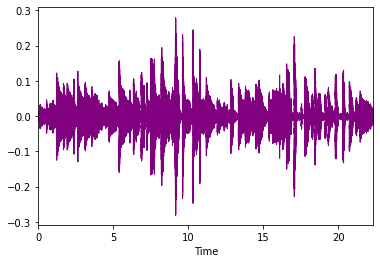

In [ ]:
librosa.display.waveplot(audiofile1,sr=sr1, x_axis='time', color='purple',offset=0.0)

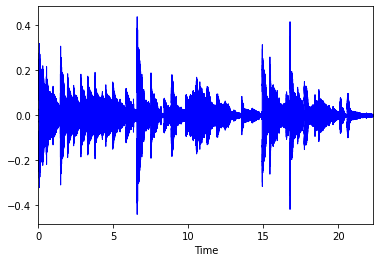

In [ ]:
librosa.display.waveplot(audiofile2,sr=sr2, x_axis='time', color='blue',offset=0.0)

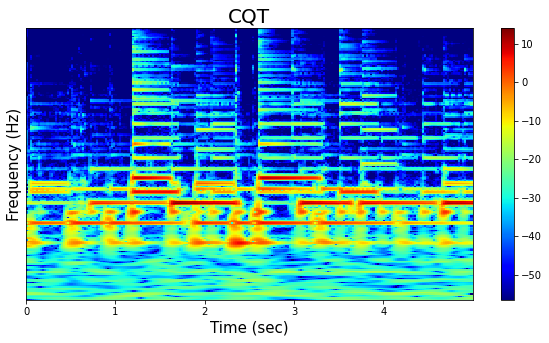

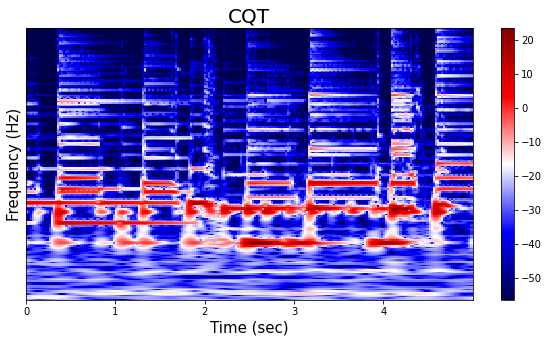

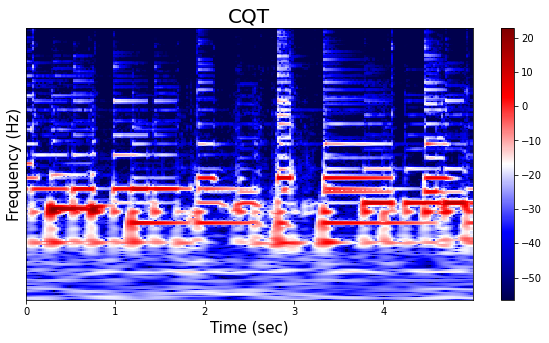

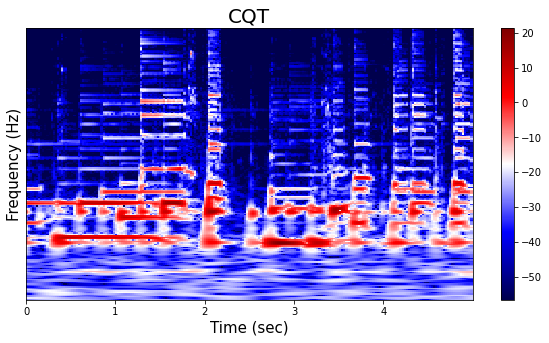

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 

In [ ]:
#TODO: Try to use one of the other common sound representations for the input. 

#Use script to generate input features as well. 
#TODO: Generate the correct output labels based on script. 
#https://github.com/andywiggins/tab-cnn/blob/master/data/TabDataReprGen.py - 
#https://github.com/andywiggins/tab-cnn/blob/master/data/Bash_TabDataReprGen.sh

#MFCC - sample plot
#May need to pad input to ensure that we have sample length for processing.
#Translate code to pytorch for consistency

#Use colab GPU, Kaggle for training larger batches.

hop_length = 512 #the default spacing between frames
n_fft = 255 #number of samples 
data = audiofile1.astype(float)
data = librosa.util.normalize(data)
data = librosa.resample(data, sr1, 22050)
example = np.abs(librosa.cqt(data,
                hop_length=512, 
                sr=22050, 
                n_bins=192, 
                bins_per_octave=24))
example = librosa.amplitude_to_db(np.abs(example))

q1 = example[:,:43*5]
fig1, ax1 = plt.subplots(figsize=(10,5))
librosa.display.specshow(q1,sr=22050,cmap='jet',hop_length=512)
ax1.set_xlabel('Time (sec)', fontsize=15)
ax1.set_xticks(np.arange(0,len(q1[0]),43))
ax1.set_xticklabels([str(i) for i in range(0,len(q1[0])//43+1,1)])
ax1.set_ylabel('Frequency (Hz)',fontsize=15)
ax1.set_title('CQT', size=20)
plt.colorbar()
q2 = example[:,43*5:43*10]
fig1, ax2 = plt.subplots(figsize=(10,5))
librosa.display.specshow(q2,sr=22050,cmap='seismic',hop_length=512)
ax2.set_xlabel('Time (sec)', fontsize=15)
ax2.set_xticks(np.arange(0,len(q2[0]),43))
ax2.set_xticklabels([str(i) for i in range(0,len(q2[0])//43+1,1)])
ax2.set_ylabel('Frequency (Hz)',fontsize=15)
ax2.set_title('CQT', size=20)
plt.colorbar()
q3 = example[:,43*10:43*15]
fig1, ax3 = plt.subplots(figsize=(10,5))
librosa.display.specshow(q3,sr=22050,cmap='seismic',hop_length=512)
ax3.set_xlabel('Time (sec)', fontsize=15)
ax3.set_xticks(np.arange(0,len(q3[0]),43))
ax3.set_xticklabels([str(i) for i in range(0,len(q3[0])//43+1,1)])
ax3.set_ylabel('Frequency (Hz)',fontsize=15)
ax3.set_title('CQT', size=20)
plt.colorbar()
q4 = example[:,43*15:43*20]
fig1, ax4 = plt.subplots(figsize=(10,5))
librosa.display.specshow(q4,sr=22050,cmap='seismic',hop_length=512)
ax4.set_xlabel('Time (sec)', fontsize=15)
ax4.set_xticks(np.arange(0,len(q4[0]),43))
ax4.set_xticklabels([str(i) for i in range(0,len(q4[0])//43+1,1)])
ax4.set_ylabel('Frequency (Hz)',fontsize=15)
ax4.set_title('CQT', size=20)
plt.colorbar()
plt.show()
print(BN1_data1["labels"][43*5])
print(BN1_data1["labels"][43*10])
print(BN1_data1["labels"][43*15])
print(BN1_data1["labels"][43*20])

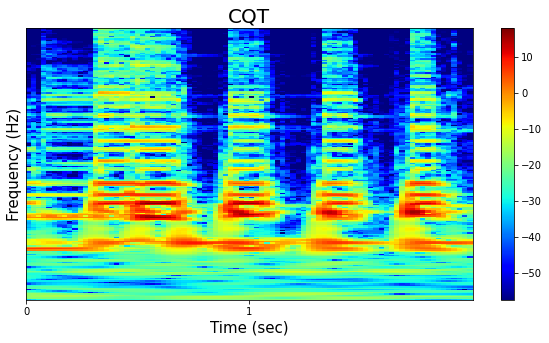

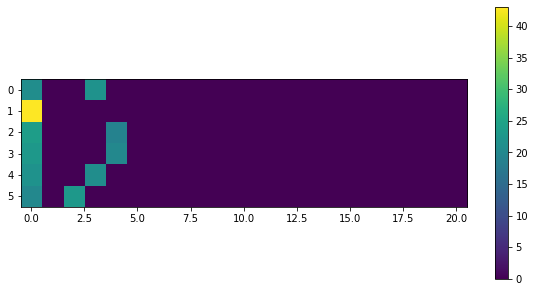

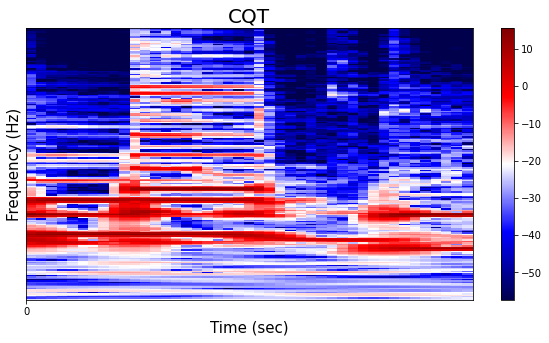

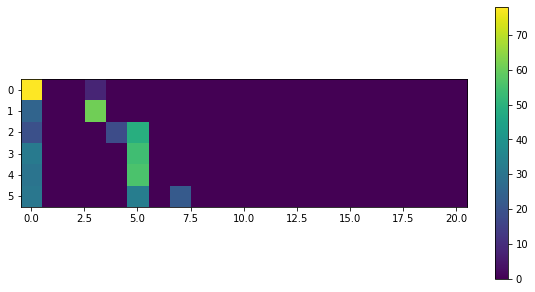

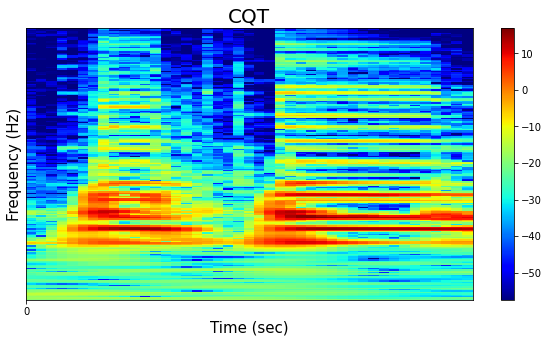

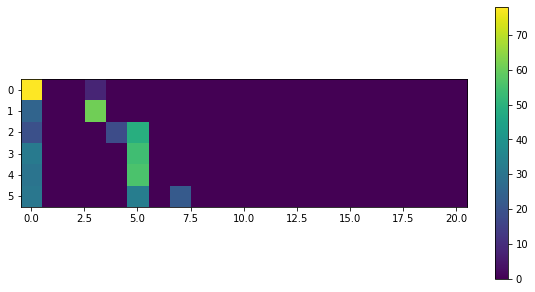

In [ ]:
#TODO: Try to use one of the other common sound representations for the input. 

#Use script to generate input features as well. 
#TODO: Generate the correct output labels based on script. 
#https://github.com/andywiggins/tab-cnn/blob/master/data/TabDataReprGen.py - 
#https://github.com/andywiggins/tab-cnn/blob/master/data/Bash_TabDataReprGen.sh

#MFCC - sample plot
#May need to pad input to ensure that we have sample length for processing.
#Translate code to pytorch for consistency

#Use colab GPU, Kaggle for training larger batches.

hop_length = 512 #the default spacing between frames
n_fft = 255 #number of samples 
data = audiofile3.astype(float)
data = librosa.util.normalize(data)
data = librosa.resample(data, sr3, 22050)
example = np.abs(librosa.cqt(data,
                hop_length=512, 
                sr=22050, 
                n_bins=192, 
                bins_per_octave=24))
example = librosa.amplitude_to_db(np.abs(example))
q1 = example[:,43*3:43*5]
fig1, ax1 = plt.subplots(figsize=(10,5))
librosa.display.specshow(q1,sr=22050,cmap = 'jet',hop_length=512)
ax1.set_xlabel('Time (sec)', fontsize=15)
ax1.set_xticks(np.arange(0,len(q1[0]),43))
ax1.set_xticklabels([str(i) for i in range(0,len(q1[0])//43+1,1)])
ax1.set_ylabel('Frequency (Hz)',fontsize=15)
ax1.set_title('CQT', size=20)
plt.colorbar()
f1 = BN1_data3["labels"][43*4:43*5]
f1 = np.sum(f1,axis = 0)
fig5, ax5 = plt.subplots(figsize=(10,5))
plt.imshow(f1)
plt.colorbar()
q2 = example[:,43*9:43*10]
fig1, ax2 = plt.subplots(figsize=(10,5))
librosa.display.specshow(q2,sr=22050,cmap='seismic',hop_length=512)
ax2.set_xlabel('Time (sec)', fontsize=15)
ax2.set_xticks(np.arange(0,len(q2[0]),43))
ax2.set_xticklabels([str(i) for i in range(0,len(q2[0])//43+1,1)])
ax2.set_ylabel('Frequency (Hz)',fontsize=15)
ax2.set_title('CQT', size=20)
plt.colorbar()
f2 = BN1_data3["labels"][43*8:43*10]
f2 = np.sum(f2,axis = 0)
fig6, ax6 = plt.subplots(figsize=(10,5))
plt.imshow(f2)
plt.colorbar()
q3 = example[:,43*14:43*15]
fig1, ax3 = plt.subplots(figsize=(10,5))
librosa.display.specshow(q3,sr=22050,cmap='jet',hop_length=512)
ax3.set_xlabel('Time (sec)', fontsize=15)
ax3.set_xticks(np.arange(0,len(q3[0]),43))
ax3.set_xticklabels([str(i) for i in range(0,len(q3[0])//43+1,1)])
ax3.set_ylabel('Frequency (Hz)',fontsize=15)
ax3.set_title('CQT', size=20)
plt.colorbar()
f3 = BN1_data3["labels"][43*8:43*10]
f3 = np.sum(f3,axis = 0)
fig6, ax6 = plt.subplots(figsize=(10,5))
plt.imshow(f3)
plt.colorbar()
plt.show()


In [ ]:
def padding(array,framelength):
    """
    :param array: numpy array
    :param xx: desired height
    :param yy: desirex width
    :return: padded array
    """
    h = array.shape[0]
    w = array.shape[1]
    xx = h
    yy = w + framelength - w%framelength

    a = (xx - h) // 2 
    aa = xx - a - h 

    b = (yy - w) // 2 
    bb = yy - b - w 

    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')
def get_sound_file_features(filenames, hlen=512, numsamples = 255):
  features= np.zeros((192,1)).astype(float)
  labels = np.zeros((2,6,21))
  for filename in filenames:
    audioarray, sr = librosa.load(filename+"_mic.wav")
    #data = np.array(padding(librosa.feature.mfcc(audioarray, n_fft = numsamples, hop_length = hlen, n_mfcc=128),10))
    data = audioarray.astype(float)
    data = librosa.util.normalize(data)
    data = librosa.resample(data, sr, 22050)
    data = np.abs(librosa.cqt(data,
                hop_length=512, 
                sr=22050, 
                n_bins=192, 
                bins_per_octave=24))
    features = np.concatenate((features,data),axis=1)
    #TODO: Need to get actual data labels
    file_labels = np.load(filename+".npz")["labels"]
    labels = np.concatenate((labels,file_labels),axis=0)

  features = features[:,1:]
  labels = labels[2:,:,:]
  return features.T,labels
processed_features, labels = get_sound_file_features(filenames)
print(processed_features.shape)
print(labels.shape)
  

(2768, 192)
(2768, 6, 21)


In [ ]:
#for i in range(len(processed_input)):
  #processed_input[i] = np.array(processed_input[i] -  np.min(processed_input[i])/np.max(processed_input[i]) - np.min(processed_input[i]))
  #processed_input[i] = processed_input[i]/np.std(processed_input[i])
processed_features = processed_features.reshape(processed_features.shape[0],1,processed_features.shape[1])
print(processed_features.shape)


(2768, 1, 192)


In [ ]:
#SPLIT DONE THREE CELLS DOWN 



#Split twice to get the validation set
#X_train, X_test, y_train, y_test = train_test_split(processed_features.T, labels, test_size=0.25, random_state=123, stratify=y)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)
#Print the shapes
#X_train.shape, X_test.shape, X_val.shape, len(y_train), len(y_test), len(y_val)

In [ ]:
input_shape=(192,1) #(2768,192)
model = keras.Sequential()
model.add(LSTM(1024,input_shape=(192,1)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
#TODO - Change size of the model output
model.add(Dense(126, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1024)              4202496   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class LSTMNet(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTMNet, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer
        self.softmax = nn.Softmax2d()
        self.relu = nn.ReLU()
    def forward(self, x):
      h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
      c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
      # Propagate input through LSTM
      output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
      hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
      out = self.relu(hn)
      out = self.fc_1(out) #first Dense
      out = self.relu(out) #relu
      out = self.fc(out) #Final Output
      out = Variable(out.view(-1,6,21),requires_grad=True)
      out = self.softmax(out)
      print(out.shape)
      return out

lstm = LSTMNet(126,192,1024,1,processed_features.shape[1])
print(lstm)

LSTMNet(
  (lstm): LSTM(192, 1024, batch_first=True)
  (fc_1): Linear(in_features=1024, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=126, bias=True)
  (softmax): Softmax2d()
  (relu): ReLU()
)


In [ ]:
#model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['acc'])
num_epochs = 5 
learning_rate = 0.0001
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate) 
#def criterion(output, target):
  #y = torch.max(target, 2)[1]
  #z = -F.log_softmax(output, 2)
  #z = z.gather(2, y.unsqueeze(2))
  #return torch.sum(z, 1).mean()

In [ ]:
from torch.autograd import Variable 
folds = 1
for i in range(folds):
  tot = labels.shape[0]
  r = [j for j in range(tot)]
  np.random.shuffle(r)
  split = int(tot*0.2)
  v = r[:split]
  tr = r[split:]
  train_features = processed_features[tr]
  train_labels = labels[tr]
  val_features = processed_features[v]
  val_labels = labels[v]
  train_features = Variable(torch.Tensor(train_features))
  train_labels = Variable(torch.Tensor(train_labels))
  val_features = Variable(torch.Tensor(val_features))
  val_labels = Variable(torch.Tensor(val_labels)) 
  print(train_features.shape)
  print(train_labels.shape)
  print(val_features.shape)
  print(val_labels.shape)

torch.Size([2215, 1, 192])
torch.Size([2215, 6, 21])
torch.Size([553, 1, 192])
torch.Size([553, 6, 21])


In [ ]:
num_epochs = 20
for epoch in range(num_epochs):
  outputs = lstm.forward(train_features) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, train_labels)
 
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

torch.Size([2215, 6, 21])
Epoch: 0, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 1, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 2, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 3, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 4, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 5, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 6, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 7, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 8, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 9, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 10, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 11, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 12, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 13, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 14, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 15, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 16, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 17, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 18, loss: 0.51193
torch.Size([2215, 6, 21])
Epoch: 19, loss

In [ ]:
print(lstm(val_features)[0])

torch.Size([553, 6, 21])
tensor([[0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018,
         0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018,
         0.0018, 0.0018, 0.0018],
        [0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018,
         0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018,
         0.0018, 0.0018, 0.0018],
        [0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018,
         0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018,
         0.0018, 0.0018, 0.0018],
        [0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018,
         0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018,
         0.0018, 0.0018, 0.0018],
        [0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018,
         0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018,
         0.0018, 0.0018, 0.00

In [ ]:
sum([0.0020, 0.0018, 0.0017, 0.0017, 0.0018, 0.0017, 0.0018, 0.0018, 0.0018,
         0.0018, 0.0019, 0.0017, 0.0019, 0.0018, 0.0018, 0.0019, 0.0018, 0.0018,
         0.0018, 0.0018, 0.0019]) + sum([0.0017, 0.0018, 0.0019, 0.0019, 0.0018, 0.0017, 0.0018, 0.0020, 0.0018,
         0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019, 0.0018, 0.0018, 0.0019,
         0.0018, 0.0018, 0.0018]) + sum([0.0019, 0.0018, 0.0019, 0.0018, 0.0018, 0.0018, 0.0018, 0.0017, 0.0018,
         0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018,
         0.0018, 0.0018, 0.0018])



0.11410000000000001

In [ ]:
def tab_precision(output,label):
  tot = 0
  correct = 0
  for i in range(6):
    for j in range(21):
      if output[i][j] == 1:
        tot += 1
        if label == 1:
          correct += 1
  return 1.0*correct/tot
def tab_recall(output,label):
  tot = 0
  correct = 0
  for i in range(6):
    for j in range(21):
      if label[i][j] == 1:
        tot += 1
        if output[i][j] == 1:
          correct += 1
  return 1.0*correct/tot
def f_score(p, r):
    return (2 * p * r) / (p + r)